In [4]:
import sys
sys.path.append("../")
from planner.local_planner.executors.dubins_curves import Dubins
import numpy as np, math
from matplotlib import pyplot as plt
from model.waypoint import Waypoint

In [5]:
class FrameBoard:
    _frame: np.ndarray
    
    def __init__(self, width: int, height: int) -> None:
        self._frame = np.zeros((width, height, 3), dtype=np.int32)
    
    def add_point(self, x: int, z: int, color = [255, 0, 0]) -> None:
        for i in range(-1, 2):
            self._frame[z+i, x, :] = color
            self._frame[z, x+i, :] = color
            
    def add_start(self, point: Waypoint, color = [0, 255, 0]) -> None:
        self.add_point(point.x, point.z, color=color)
    
    def add_end(self, point: Waypoint, color = [255, 255, 0]) -> None:
        self.add_point(point.x, point.z, color=color)
    
    def add_path(self, path: list[Waypoint], color = [255, 255, 255]) -> None:
        for p in path:
            self._frame[p.z, p.x] = color
            
    def show(self) -> None:
        plt.imshow(self._frame, interpolation='nearest')
        
        
    def build_dubins_path(self, start: Waypoint, end: Waypoint, radius, color = [255, 255, 255], points: int = 1):
        res = Dubins(radius=radius, point_separation=points).build_path(
            start=start, 
            goal=end, 
            max_width=self._frame.shape[1],
            max_height=self._frame.shape[0]
        )
        self.add_path(res)
            


Investigate Radius

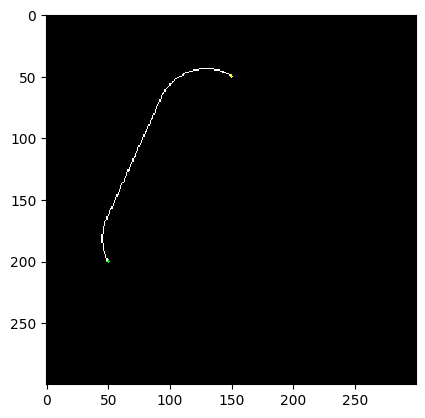

In [12]:
start = Waypoint(50, 200, 0)
end = Waypoint(150, 50, -10)
frame = FrameBoard(300, 300)
frame.build_dubins_path(start, end, radius=40, points=1)
frame.show()
frame.add_start(start)
frame.add_end(end)
frame.show()